In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
members = pd.read_csv('../data/SCoData_members_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})

In [3]:
members.columns

Index(['uri', 'name', 'sort_name', 'title', 'gender', 'is_organization',
       'has_card', 'birth_year', 'death_year', 'membership_years', 'viaf_url',
       'wikipedia_url', 'nationalities', 'addresses', 'postal_codes',
       'arrondissements', 'coordinates', 'notes', 'updated'],
      dtype='object')

In [4]:
members.shape

(5235, 19)

In [5]:
members.sample(5)

,uri,name,sort_name,title,gender,is_organization,has_card,birth_year,death_year,membership_years,viaf_url,wikipedia_url,nationalities,addresses,postal_codes,arrondissements,coordinates,notes,updated
537,https://shakespeareandco.princeton.edu/members...,Stella Bowen / Mrs. Ford M. Ford,"Bowen, Stella",NaN,Female,False,False,1893.0,1947.0,1923,http://viaf.org/viaf/75359836/,https://en.wikipedia.org/wiki/Stella_Bowen,Australia,"65 boulevard Arago, Paris",75013,13,"48.83467, 2.34286","The Shakespeare and Company <a href=""https://s...",2021-08-28T23:45:57+00:00
4925,https://shakespeareandco.princeton.edu/members...,Volkova,Volkova,NaN,NaN,False,False,NaN,NaN,1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-23T04:05:31.435541+00:00
1415,https://shakespeareandco.princeton.edu/members...,M. Donnard,"Donnard, M.",M.,Male,False,False,NaN,NaN,1922;1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely the same person as [M. Donard](https://...,2021-11-22T22:54:36.990287+00:00
3059,https://shakespeareandco.princeton.edu/members...,Mr. Ludwigsohn,"Ludwigsohn, Mr.",Mr.,Male,False,False,NaN,NaN,1925;1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-02T01:06:19+00:00
1355,https://shakespeareandco.princeton.edu/members...,Orlando de Sola,"de Sola, Orlando",NaN,Male,False,False,NaN,NaN,1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-07T17:28:36+00:00


explanation of gender in the dataset https://docs.google.com/document/d/16O2SFzSe4bv39rrKCY4A9zG1yWbfC6_63kXTAj-oefY/edit

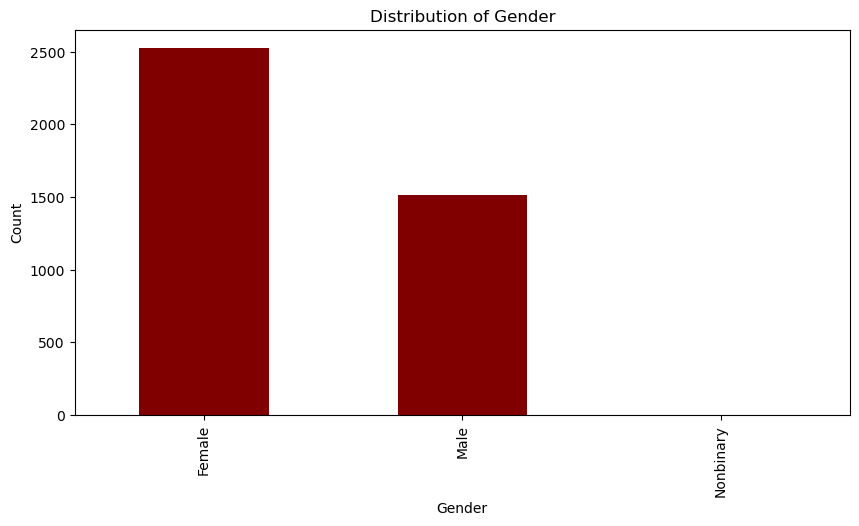

Mode of gender distribution: Female


In [6]:
mode_gender = members['gender'].value_counts().idxmax() # mode

# SINCE VALUE_COUNTS DOES NOT COUNT NAN; HOW MANY ARE UNDEFINED????

count_gender = members['gender'].value_counts().sort_index()  # operate on series ; count

fig, ax = plt.subplots(figsize=(10, 5))

count_gender.plot(kind='bar', color='maroon', ax=ax)

ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender')

plt.show()

print(f"Mode of gender distribution: {mode_gender}")

In [7]:
count_gender.index.tolist()

['Female', 'Male', 'Nonbinary']

In [8]:
from scipy.stats import entropy

gender_counts = members['gender'].value_counts(normalize=True)
entropy_gender = entropy(gender_counts)

print(f"Entropy of gender distribution: {entropy_gender}")

Entropy of gender distribution: 0.6636712663698797


In [9]:
gender_counts

Female       0.624907
Male         0.374845
Nonbinary    0.000248
Name: gender, dtype: float64

In [10]:
undefined_gender_count = members['gender'].isna().sum()
print(f"Number of undefined gender values: {undefined_gender_count}")

Number of undefined gender values: 1196


In [11]:
total_defined_gender_count = len(members['gender']) - undefined_gender_count
print(f"Number of defined gender values: {total_defined_gender_count}")

Number of defined gender values: 4039


In [12]:
print(f"Number of total gender values: {len(members['gender'])}")

Number of total gender values: 5235


In [13]:
members[['sort_name','gender','notes']].sample(7)

,sort_name,gender,notes
2276,Henley,NaN,NaN
2278,"Hennessy, Mlle",Female,NaN
2204,"Harrison, P.",Male,NaN
5066,"Wilkinson, Miss",Female,NaN
3900,"Pratt, Mr.",Male,NaN
1680,"Finn, Allan",Male,NaN
2924,Lester,NaN,NaN


In [14]:
unnamed_members_count = (members['sort_name'] == '[unnamed member]').sum()
unnamed_members_count

14

In [15]:
members[['title']].sample(8)

,title
1018,Mrs.
2420,Miss
1587,Mlle
1418,Mr.
766,Miss
2257,Mrs.
4362,NaN
4525,NaN


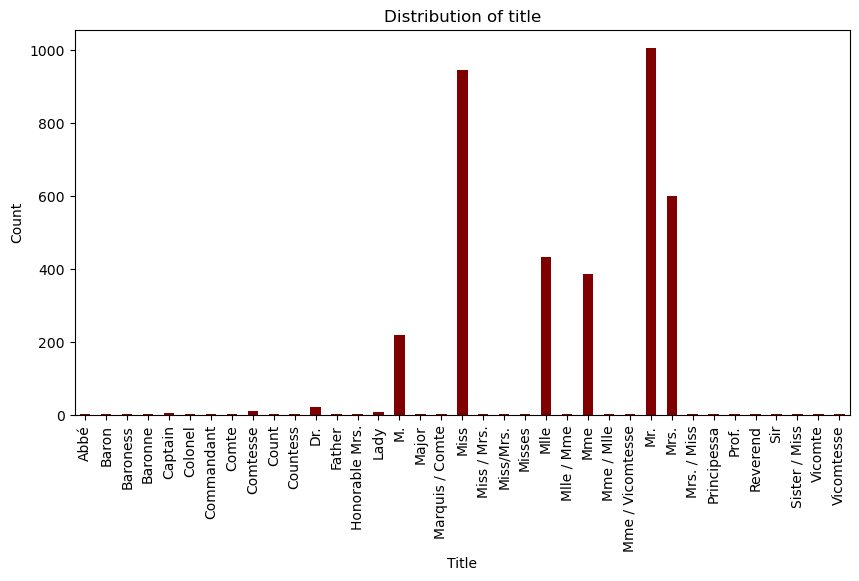

Mode of title distribution: Mr.


In [16]:
mode_title = members['title'].value_counts().idxmax() # mode

count_title = members['title'].value_counts().sort_index()  # operate on series ; count

fig, ax = plt.subplots(figsize=(10, 5))

count_title.plot(kind='bar', color='maroon', ax=ax)

ax.set_xlabel('Title')
ax.set_ylabel('Count')
ax.set_title('Distribution of title')

plt.show()

print(f"Mode of title distribution: {mode_title}")

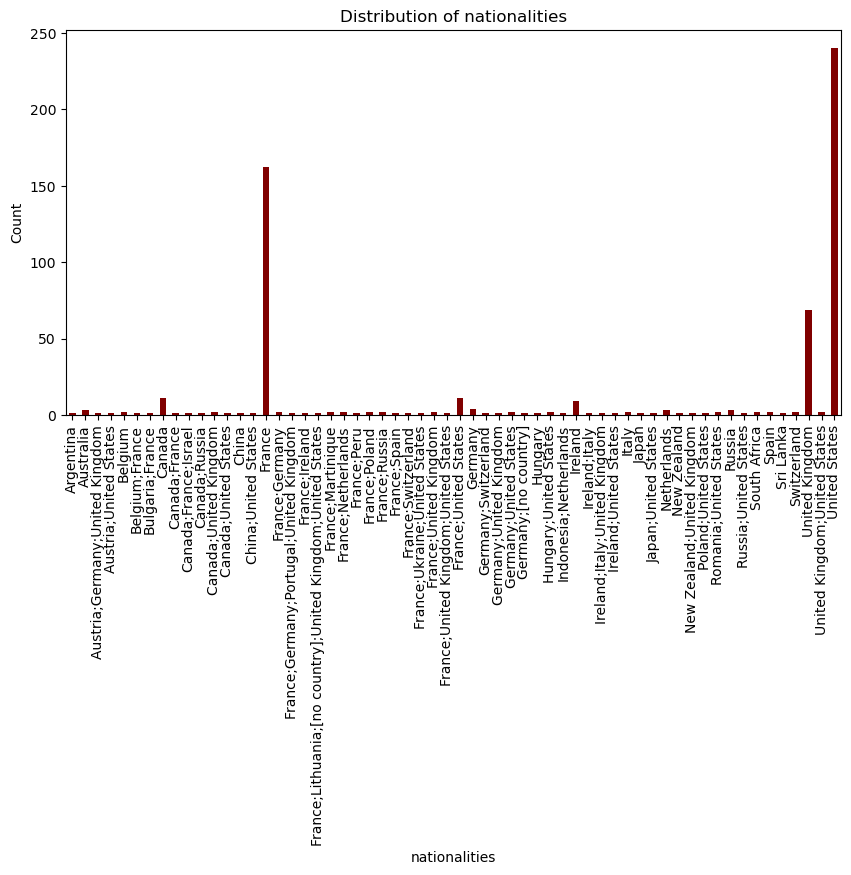

Mode of nationalities distribution: United States


In [17]:
mode_nationalities = members['nationalities'].value_counts().idxmax() # mode

count_nationalities = members['nationalities'].value_counts().sort_index()  # operate on series ; count

fig, ax = plt.subplots(figsize=(10, 5))

count_nationalities.plot(kind='bar', color='maroon', ax=ax)

ax.set_xlabel('nationalities')
ax.set_ylabel('Count')
ax.set_title('Distribution of nationalities')

plt.show()

print(f"Mode of nationalities distribution: {mode_nationalities}")

In [18]:
unknown_nationalities_members_count = members['nationalities'].isna().sum()
print(f"Number of members with unknown nationalities: {unknown_nationalities_members_count}")

Number of members with unknown nationalities: 4654


In [19]:
known_nationalities_members_count = len(members['nationalities']) - unknown_nationalities_members_count
print(f"Number of members with known nationalities: {known_nationalities_members_count}")

Number of members with known nationalities: 581


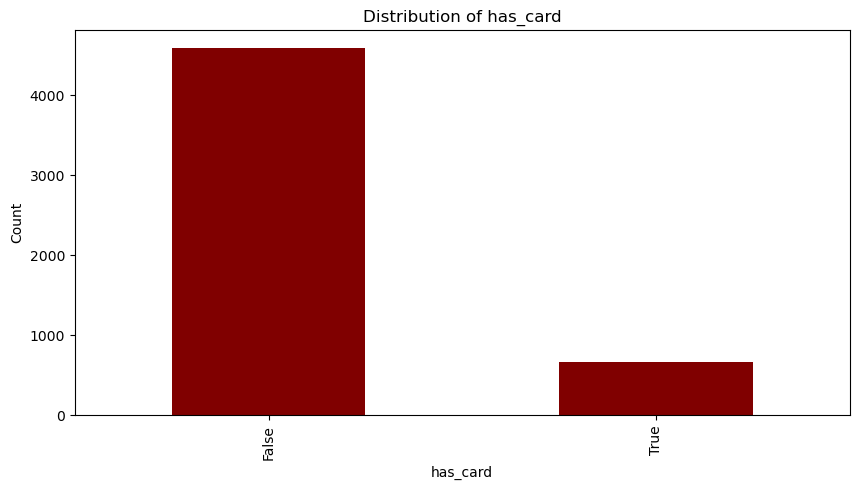

Mode of has_card distribution: False


In [20]:
mode_has_card = members['has_card'].value_counts().idxmax() # mode

count_has_card= members['has_card'].value_counts().sort_index()  # operate on series ; count

fig, ax = plt.subplots(figsize=(10, 5))

count_has_card.plot(kind='bar', color='maroon', ax=ax)

ax.set_xlabel('has_card')
ax.set_ylabel('Count')
ax.set_title('Distribution of has_card')

plt.show()

print(f"Mode of has_card distribution: {mode_has_card}")

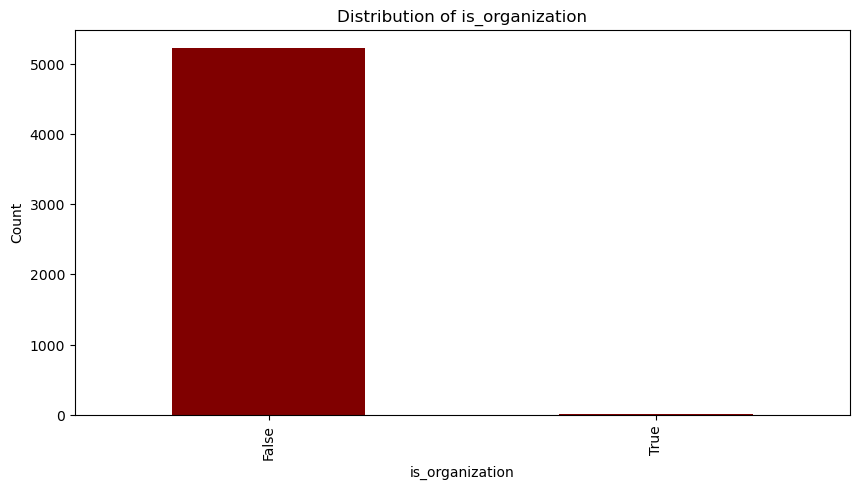

Mode of is_organization distribution: False


In [21]:
mode_is_organization = members['is_organization'].value_counts().idxmax() # mode

count_is_organization = members['is_organization'].value_counts().sort_index()  # operate on series ; count

fig, ax = plt.subplots(figsize=(10, 5))

count_is_organization.plot(kind='bar', color='maroon', ax=ax)

ax.set_xlabel('is_organization')
ax.set_ylabel('Count')
ax.set_title('Distribution of is_organization')

plt.show()

print(f"Mode of is_organization distribution: {mode_is_organization}")

In [22]:
count_is_organization # TO DO USE unique

False    5224
True       11
Name: is_organization, dtype: int64

In [23]:
is_organization_members = members[members['is_organization'] == True]['sort_name'].unique().tolist() # using .unique() bc British Institute appears twice
is_organization_members

['Bibliothèque de Périgneux',
 'British Institute',
 'Europe Nouvelle',
 'Guilde Internationale',
 'Librairie des deux Lycée',
 'Mesures',
 'Nouvelle Revue Critique',
 'Revues, Les',
 'Rhein Verlag',
 'Synops']